In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300,2,centers = 2,random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'summer')

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_GBN = GaussianNB()
model_GBN.fit(X,y)


In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18]*rng.rand(2000,2)
ynew = model_GBN.predict(Xnew)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'summer')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:,1], c=ynew, s=20, cmap = 'summer', alpha = 0.1)
plt.axis(lim)

In [ ]:
Random Forest

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data%22
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width',  'Class']
dataset = pd.read_csv(path, names=headernames) 
dataset.head()
dataset.describe(include='all')

In [ ]:
dataset['Class'].value_counts()
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#predicting probabilty
y_prob = classifier.predict_proba(X_test)[:,1]

In [ ]:
A = pd.DataFrame({"prediction": y_pred, 'Probability': y_prob})
A

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
result = confusion_matrix(y_test, y_pred)  
print("Confusion Matrix:")
print(result)

In [ ]:
result1 = classification_report(y_test, y_pred)  
print("Classification Report:",)
print (result1)

In [ ]:
result2 = accuracy_score(y_test,y_pred)  
print("Accuracy:",result2)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
diabetes = datasets.load_diabetes()


In [9]:
diabetes


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [10]:
X = diabetes.data[:, np.newaxis, 2]
X_train = X[:-30]  
X_test = X[-30:]
y_train = diabetes.target[:-30]  
y_test = diabetes.target[-30:]

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)  
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))  
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


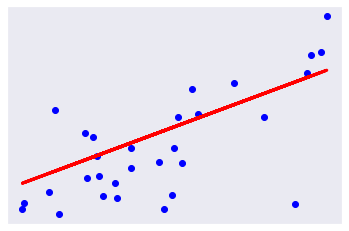

In [13]:
plt.scatter(X_test, y_test,	color='blue')  
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())  
plt.show()

In [14]:
#to get the root mean squared which is proper explanation of the error
np.sqrt(mean_squared_error(y_test, y_pred))

55.09137968222677

## MLR
### Boston Dataset

In [15]:
boston = datasets.load_boston(return_X_y=False)
boston

C:\Users\samboss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3